In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from code.reductions import CNN_GCNN, EENTh, DROP

from code.knn import callKNN
from code.svm import callSVM

In [2]:
def load_ds(name, num_folds=10):

    folds_data = []

    for fold in range(num_folds):

        train_file = f'../{name}_csv/{name}.fold.00000{fold}.train.csv'

        df_train = pd.read_csv(train_file)

        X_train = df_train.iloc[:, :-1]
        y_train = df_train.iloc[:, -1]

        folds_data.append((X_train, y_train,))

    return folds_data     

def load_ds_train_reductions(name, method, num_folds=10):

    folds_data = []

    for fold in range(num_folds):

        train_file = f'../{name}_csv/{name}.fold.00000{fold}_{method}.train.csv'
        test_file = f'../{name}_csv/{name}.fold.00000{fold}.test.csv'

        df_train = pd.read_csv(train_file)
        df_test = pd.read_csv(test_file)

        X_train = df_train.iloc[:, :-1]
        y_train = df_train.iloc[:, -1]
        X_test = df_test.iloc[:, :-1]
        y_test = df_test.iloc[:, -1]

        folds_data.append((X_train, X_test, y_train, y_test))

    return folds_data   

In [3]:
def store_ds(name, fold, method, prototypes_X, prototypes_y, X_train, y_train):
    X_train = pd.DataFrame(prototypes_X, columns = X_train.columns)
    y_train = pd.Series(prototypes_y, name = y_train.name, dtype=int)
    df = pd.concat((X_train, y_train), axis=1)
    df.to_csv(f'../{name}_csv/{name}.fold.00000{fold}_{method}.train.csv', index=False)

In [4]:
def plot_grid(prototypes_X, prototypes_y, X_train_original, y_train_original, ax, title, show_legend=False): 
    # Plot original training data points
    if X_train_original is not None:
        ax.scatter(X_train_original[y_train_original == 0][:, 0], X_train_original[y_train_original == 0][:, 1], 
                color='blue', label='Class 0', alpha=0.3, s=5)
        ax.scatter(X_train_original[y_train_original == 1][:, 0], X_train_original[y_train_original == 1][:, 1], 
                color='red', label='Class 1', alpha=0.3, s=5)

    # Check if prototypes are provided, and plot them if they are
    if prototypes_X is not None:
        ax.scatter(prototypes_X[prototypes_y == 0][:, 0], prototypes_X[prototypes_y == 0][:, 1], 
                    color='blue', edgecolor='k', label='Prototype Class 0', s=10, alpha=0.7)
        ax.scatter(prototypes_X[prototypes_y == 1][:, 0], prototypes_X[prototypes_y == 1][:, 1], 
                    color='red', edgecolor='k', label='Prototype Class 1', s=10, alpha=0.7)

    # Set axis limits and title
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title(title)

    # Only show legend if `show_legend` is True
    if show_legend:
        ax.legend()


In [5]:
from code.reductions import CNN_GCNN, EENTh, DROP

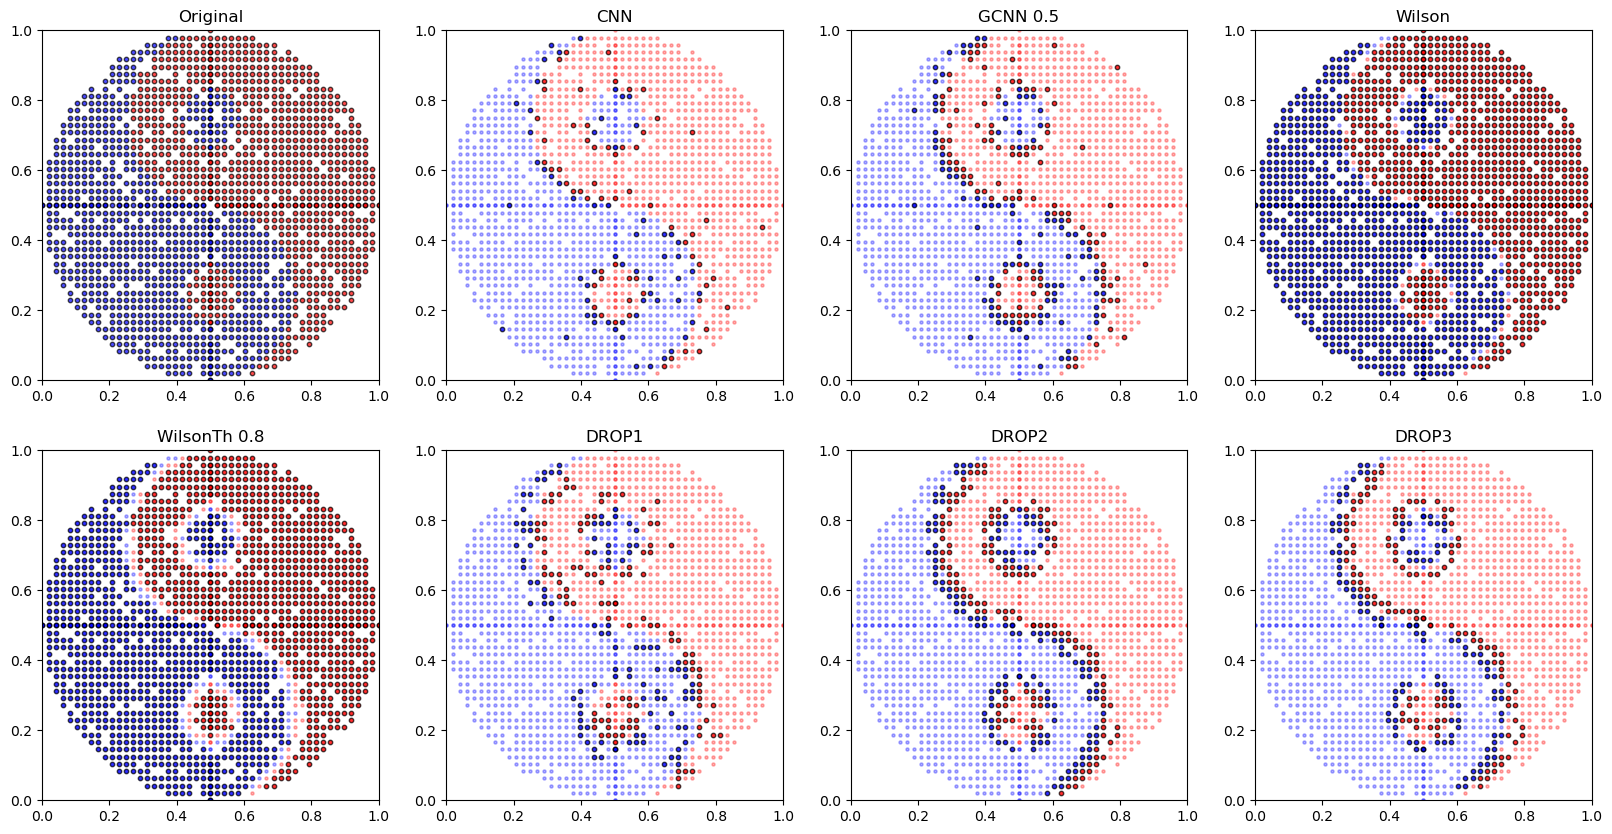

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
datasets = ['grid', 'sick']
titles = ['Original', 'CNN', 'GCNN 0.5', 'Wilson', 'WilsonTh 0.8', 'DROP1', 'DROP2', 'DROP3']

# Loop through datasets and apply different methods
for ds in datasets:
    for i, (X_train, y_train) in enumerate(load_ds(ds)):

        # Original dataset plot
        if ds == 'grid' and i == 0:
            plot_grid(X_train.values, y_train.values, None, None, ax[0, 0], f'{titles[0]}')

        # CNN
        if ds == 'grid' and i == 0:
            cnn = CNN_GCNN(rho=0)
            prototypes_X, prototypes_y = cnn.fit(X_train.values, y_train.values)
            plot_grid(prototypes_X, prototypes_y, X_train.values, y_train.values, ax[0, 1], f'{titles[1]}')
            #store_ds(ds, i, 'CNN', prototypes_X, prototypes_y, .values, y_train)

        cnn = CNN_GCNN(rho=0.5)
        prototypes_X, prototypes_y = cnn.fit(X_train.values, y_train.values)
        if ds == 'grid' and i == 0:
            plot_grid(prototypes_X, prototypes_y, X_train.values, y_train.values, ax[0, 2], f'{titles[2]}')
        store_ds(ds, i, 'CNN', prototypes_X, prototypes_y, X_train, y_train)

        # EENTh
        if ds == 'grid' and i == 0:
            eetnh = EENTh(k=3, threshold=None)
            prototypes_X, prototypes_y = eetnh.fit(X_train.values, y_train.values)
            plot_grid(prototypes_X, prototypes_y, X_train.values, y_train.values, ax[0, 3], f'{titles[3]}')
            #store_ds(ds, i, 'EENTh', prototypes_X, prototypes_y, X_train, y_train)

        eetnh = EENTh(k=3, threshold=0.8)
        prototypes_X, prototypes_y = eetnh.fit(X_train.values, y_train.values)
        if ds == 'grid' and i == 0:
            plot_grid(prototypes_X, prototypes_y, X_train.values, y_train.values, ax[1, 0], f'{titles[4]}')
        store_ds(ds, i, 'EENTh', prototypes_X, prototypes_y, X_train, y_train)

        # DROP
        if ds == 'grid' and i == 0:
            drop = DROP(drop_type='drop1', k=7)
            prototypes_X, prototypes_y = drop.fit(X_train.values, y_train.values)
            plot_grid(prototypes_X, prototypes_y, X_train.values, y_train.values, ax[1, 1], f'{titles[5]}')
            #store_ds(ds, i, 'DROP', prototypes_X, prototypes_y, X_train, y_train)

        if ds == 'grid' and i == 0:
            drop = DROP(drop_type='drop2', k=7)
            prototypes_X, prototypes_y = drop.fit(X_train.values, y_train.values)
            plot_grid(prototypes_X, prototypes_y, X_train.values, y_train.values, ax[1, 2], f'{titles[6]}')
            #store_ds(ds, i, 'DROP', prototypes_X, prototypes_y, X_train, y_train)

        drop = DROP(drop_type='drop3', k=7)
        prototypes_X, prototypes_y = drop.fit(X_train.values, y_train.values)
        if ds == 'grid' and i == 0:
            plot_grid(prototypes_X, prototypes_y, X_train.values, y_train.values, ax[1, 3], f'{titles[7]}')
        store_ds(ds, i, 'DROP', prototypes_X, prototypes_y, X_train, y_train)
        break
    break

    

In [5]:
dataset_names = ['sick', 'grid']
methods = ['svm', 'knn']
best_params = {'grid': {
                    'knn': {
                        'K': 7,
                        'Distance': 'HEOM',
                        'Voting scheme': 'Inverse_Distance_Weights',
                        'Weight scheme': 'Mutual_classifier'},
                    'svm': 
                        {'Kernel': 'rbf'}}, 
                'sick': {
                    'knn':{
                        'K': 7, 
                        'Distance': 'minkowski1', 
                        'Voting scheme': 'Majority_class', 
                        'Weight scheme': 'ANOVA'},
                    'svm': 
                        {'Kernel': 'rbf'}}}

for ds_name in dataset_names:
    for method in methods:
        for reduction in ['CNN', 'DROP', 'EENTh']:
            for i, (X_train, X_test, y_train, y_test) in enumerate(load_ds_train_reductions(ds_name, reduction)):
                print(i, reduction)
                if method == 'knn':
                    results = callKNN(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,  
                                    dist_func=best_params[ds_name][method]['Distance'], 
                                    voting_scheme=best_params[ds_name][method]['Voting scheme'], 
                                    weight_scheme=best_params[ds_name][method]['Weight scheme'], 
                                    k=best_params[ds_name][method]['K'])    
                elif method == 'svm':
                    results = callSVM(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                                    kernel=best_params[ds_name][method]['Kernel'])
                results.to_csv(f'../results_{method}_reduced/results_{ds_name}_{i}_{reduction}.csv', index=False)

0 CNN
1 CNN
2 CNN
3 CNN
4 CNN
5 CNN
6 CNN
7 CNN
8 CNN
9 CNN
0 DROP
1 DROP
2 DROP
3 DROP
4 DROP
5 DROP
6 DROP
7 DROP
8 DROP
9 DROP
0 EENTh
1 EENTh
2 EENTh
3 EENTh
4 EENTh
5 EENTh
6 EENTh
7 EENTh
8 EENTh
9 EENTh
0 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


1 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


2 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


3 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


4 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


5 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


6 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


7 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


8 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


9 CNN


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


0 DROP
1 DROP


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 28 29 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1  2  3  4  5  6  8  9 10 11 12 13 14 16 18 28 29 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univar

2 DROP
3 DROP


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 20 22 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  3  4  5  6  8  9 10 11 12 13 14 16 18 28 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


4 DROP
5 DROP


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  3  4  5  6  8  9 10 11 12 13 14 18 20 22 28 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1  2  3  4  5  6  8  9 10 11 12 13 14 16 18 28 29 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_s

6 DROP
7 DROP


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 24 28 29 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univar

8 DROP
9 DROP


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 28 29 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariat

0 EENTh
1 EENTh
2 EENTh
3 EENTh
4 EENTh
5 EENTh


c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\xavid\anaconda3\envs\ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


6 EENTh
7 EENTh
8 EENTh
9 EENTh
0 CNN
1 CNN
2 CNN
3 CNN
4 CNN
5 CNN
6 CNN
7 CNN
8 CNN
9 CNN
0 DROP
1 DROP
2 DROP
3 DROP
4 DROP
5 DROP
6 DROP
7 DROP
8 DROP
9 DROP
0 EENTh
1 EENTh
2 EENTh
3 EENTh
4 EENTh
5 EENTh
6 EENTh
7 EENTh
8 EENTh
9 EENTh
0 CNN
1 CNN
2 CNN
3 CNN
4 CNN
5 CNN
6 CNN
7 CNN
8 CNN
9 CNN
0 DROP
1 DROP
2 DROP
3 DROP
4 DROP
5 DROP
6 DROP
7 DROP
8 DROP
9 DROP
0 EENTh
1 EENTh
2 EENTh
3 EENTh
4 EENTh
5 EENTh
6 EENTh
7 EENTh
8 EENTh
9 EENTh
